# Assessment 1

In [1]:
import pandas as pd

#### 1) Import pandas and read in the banklist.csv file into a dataframe called banks. 

In [132]:
banks = pd.read_csv(r'C:\Users\kusha\OneDrive\Desktop\TOPS\Tops\Pandas\Assessment\banklist.csv')
banks

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17
...,...,...,...,...,...,...,...
548,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",27-Jul-01,19-Aug-14
549,Malta National Bank,Malta,OH,6629,North Valley Bank,3-May-01,18-Nov-02
550,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2-Feb-01,18-Feb-03
551,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,14-Dec-00,17-Mar-05


#### 2) Show the head of the dataframe. 

In [133]:
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17


#### 3) What are the column names? 

In [134]:
banks.columns

Index(['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution',
       'Closing Date', 'Updated Date'],
      dtype='object')

#### 4) How many States (ST) are represented in this data set? 

In [135]:
banks.ST.unique()

array(['IL', 'WI', 'LA', 'UT', 'NJ', 'AR', 'GA', 'PA', 'TN', 'WA', 'CO',
       'PR', 'FL', 'MN', 'CA', 'MD', 'OK', 'OH', 'SC', 'VA', 'ID', 'TX',
       'CT', 'AZ', 'NV', 'NC', 'KY', 'MO', 'KS', 'AL', 'MI', 'IN', 'IA',
       'NE', 'MS', 'NM', 'OR', 'NY', 'MA', 'SD', 'WY', 'WV', 'NH', 'HI'],
      dtype=object)

In [136]:
print("Number Of The States:-",len(banks.ST.unique()))

Number Of The States:- 44


#### 5) Get a list or array of all the states in the data set. 

In [137]:
print("List Of States:-\n",banks["ST"].unique())

List Of States:-
 ['IL' 'WI' 'LA' 'UT' 'NJ' 'AR' 'GA' 'PA' 'TN' 'WA' 'CO' 'PR' 'FL' 'MN'
 'CA' 'MD' 'OK' 'OH' 'SC' 'VA' 'ID' 'TX' 'CT' 'AZ' 'NV' 'NC' 'KY' 'MO'
 'KS' 'AL' 'MI' 'IN' 'IA' 'NE' 'MS' 'NM' 'OR' 'NY' 'MA' 'SD' 'WY' 'WV'
 'NH' 'HI']


#### 6) What are the top 5 states with the most failed banks? 

In [138]:
banks.groupby(("ST"))["CERT"].sum().sort_values().head()

ST
WV     6782
HI    21029
WY    22754
MA    26619
MS    30087
Name: CERT, dtype: int64

#### 7) What are the top 5 acquiring institutions? 

In [139]:
banks.groupby(("Acquiring Institution"))["Bank Name"].count().sort_values(ascending= False).head(5)

Acquiring Institution
No Acquirer                            31
State Bank and Trust Company           12
First-Citizens Bank & Trust Company    11
Ameris Bank                            10
U.S. Bank N.A.                          9
Name: Bank Name, dtype: int64

#### 8) How many banks has the State Bank of Texas acquired? How many of them were actually in Texas? 

In [140]:
a = banks.groupby("Acquiring Institution")["Bank Name"].count()

#Find The State Bank Of India
b = a.get("State Bank of Texas", 0)

print("Total banks acquired by State Bank of Texas:-",b)

#How many Banks were actually in Texas
c = banks[(banks["Acquiring Institution"] == "State Bank of Texas") & (banks["ST"] == "TX")]

d = len(c)

print("Number of those banks located in Texas:", d)

Total banks acquired by State Bank of Texas:- 3
Number of those banks located in Texas: 1


#### 9) What is the most common city in California for a bank to fail in? 

In [141]:
banks[(banks["CERT"].sort_values(ascending=True)) & (banks["ST"]=="CA")]

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
131,Citizens Bank of Northern California,Nevada City,CA,33983,Tri Counties Bank,23-Sep-11,9-Oct-12
182,"San Luis Trust Bank, FSB",San Luis Obispo,CA,34783,First California Bank,18-Feb-11,12-Sep-16
183,Charter Oak Bank,Napa,CA,57855,Bank of Marin,18-Feb-11,12-Sep-12
218,First Vietnamese American Bank,Westminster,CA,57885,Grandpoint Bank,5-Nov-10,12-Sep-12
220,Western Commercial Bank,Woodland Hills,CA,58087,First California Bank,5-Nov-10,12-Sep-16
243,Sonoma Valley Bank,Sonoma,CA,27259,Westamerica Bank,20-Aug-10,12-Sep-12
244,Los Padres Bank,Solvang,CA,32165,Pacific Western Bank,20-Aug-10,12-Sep-12
245,Butte Community Bank,Chico,CA,33219,"Rabobank, N.A.",20-Aug-10,12-Sep-12
284,"Granite Community Bank, NA",Granite Bay,CA,57315,Tri Counties Bank,28-May-10,14-Sep-12
293,1st Pacific Bank of California,San Diego,CA,35517,City National Bank,7-May-10,13-Dec-12


# Assessment 2: 

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Q 1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year. 

In [4]:
df = pd.read_csv(r'C:\Users\kusha\OneDrive\Desktop\TOPS\Tops\Pandas\Assessment\historical_automobile_sales.csv')

In [5]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [6]:
x = df["Year"]
y = df["Automobile_Sales"]

<AxesSubplot:xlabel='Year', ylabel='Automobile_Sales'>

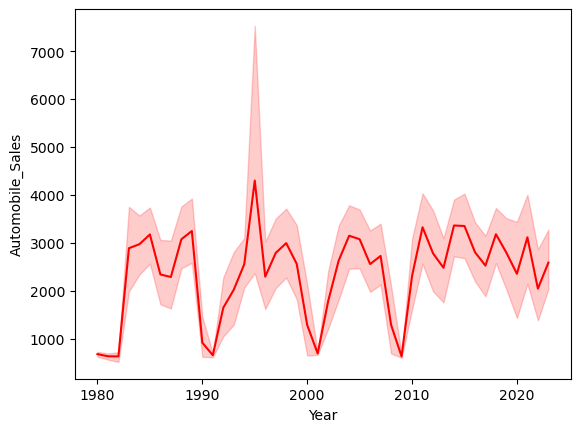

In [9]:
sns.lineplot(x=x,y=y,color="red")

#### Q 2: Plot different lines for categories of vehicle type and analyze the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

In [25]:
df.head(2)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

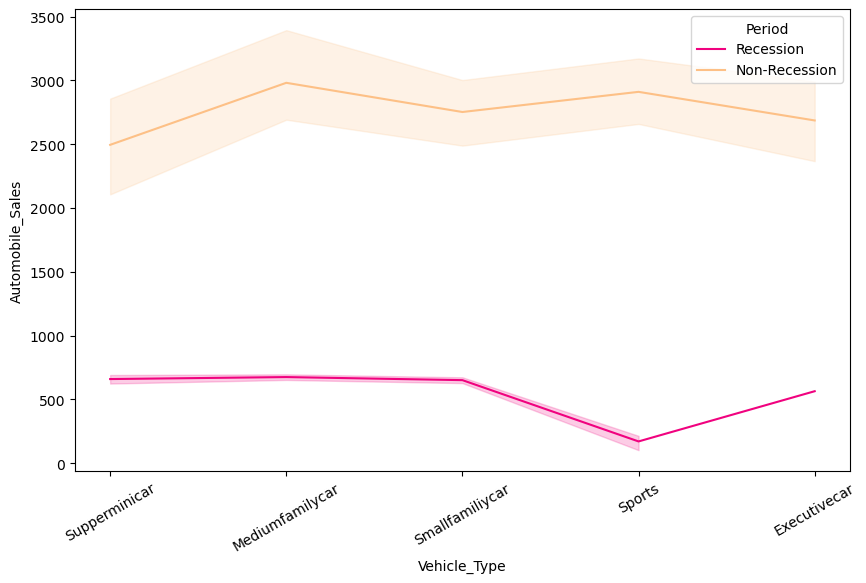

In [98]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x='Vehicle_Type',y='Automobile_Sales',hue="Period",palette="Accent_r")

plt.xticks(rotation = 30)

#### Q 3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non- recession period. 

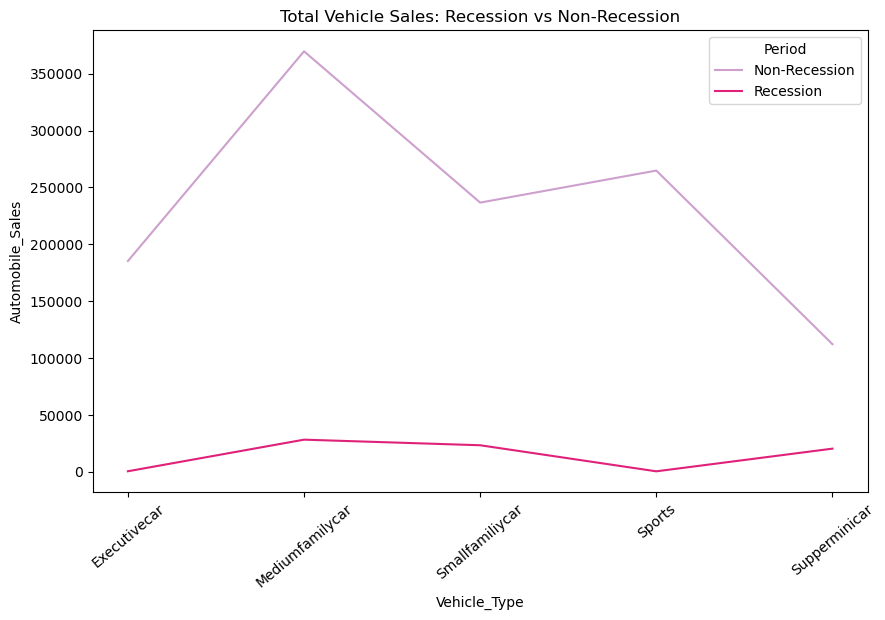

In [116]:
df['Period'] = df['Recession'].map({0: 'Non-Recession', 1: 'Recession'})


grouped = df.groupby(['Vehicle_Type', 'Period'])['Automobile_Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='Vehicle_Type', y='Automobile_Sales', hue='Period',palette="PuRd")

plt.title('Total Vehicle Sales: Recession vs Non-Recession')
plt.xticks(rotation=40)
plt.show()


#### Q 4: Now you want to compare the sales of different vehicle types during a recession and a non-recession period 

In [111]:
gd = df.groupby(['Vehicle_Type','Period'])['Automobile_Sales'].sum().reset_index()

In [112]:
gd

,Vehicle_Type,Period,Automobile_Sales
0,Executivecar,Non-Recession,185364.10
1,Executivecar,Recession,564.00
2,Mediumfamilycar,Non-Recession,369706.24
3,Mediumfamilycar,Recession,28343.60
4,Smallfamiliycar,Non-Recession,236728.60
5,Smallfamiliycar,Recession,23426.40
6,Sports,Non-Recession,264867.90
7,Sports,Recession,511.00
8,Supperminicar,Non-Recession,112285.90
9,Supperminicar,Recession,20437.40


In [125]:
a =df["Automobile_Sales"].sum()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Executivecar'),
  Text(1, 0, 'Mediumfamilycar'),
  Text(2, 0, 'Smallfamiliycar'),
  Text(3, 0, 'Sports'),
  Text(4, 0, 'Supperminicar')])

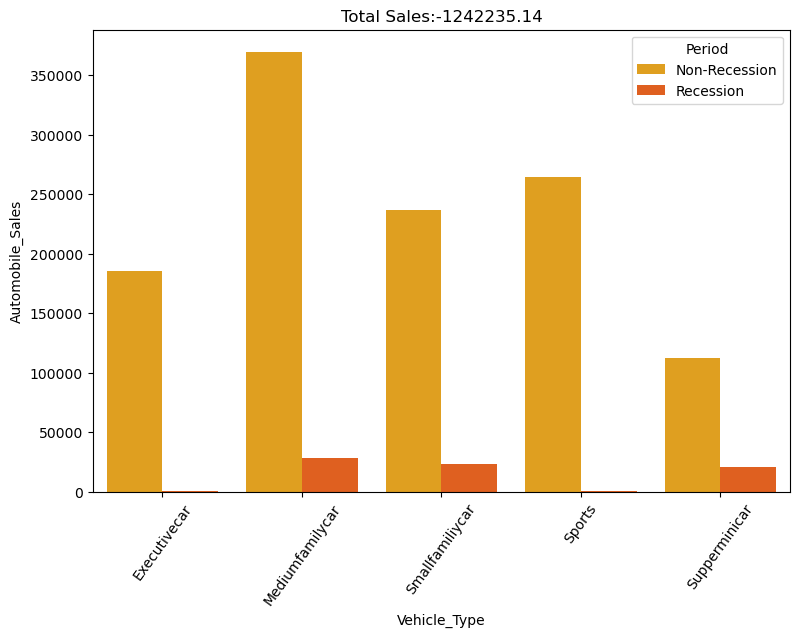

In [131]:
plt.figure(figsize=(9,6))

sns.barplot(data=gd,x='Vehicle_Type',y='Automobile_Sales',hue='Period',palette="autumn_r")

plt.title(f"Total Sales:-{a:.2f}")
plt.xticks(rotation=54)